In [6]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [11]:
# Data obtained from https://data-osi.opendata.arcgis.com/datasets/1516dc49dfc64395b5a6ff582cba8150_3/data
# Local Electoral Areas Boundaries Ungeneralised - OSi National Administrative Boundaries - 2015
# Spacial data for all countries can be found in https://gadm.org/index.html
map_df = gpd.read_file('Ireland_shp')

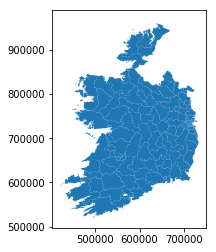

In [8]:
map_df.plot()

In [20]:
map_df.head(2)

,OBJECTID,LE_ID,LE_ENGLISH,LE_GAEILGE,COUNTY,CONTAE,PROVINCE,CENTROID_X,CENTROID_Y,GUID,ObjectID_1,Shape__Are,Shape__Len,geometry
0,1,1360421,GALWAY CITY CENTRAL (6),None,Galway,Gaillimh,Connacht,528586,727500,2AE196293EFE13A3E055000000000001,1,1.853483e+07,24646.528180,"POLYGON ((530299.406 726755.009, 530304.699 72..."
1,2,1360402,BALLINASLOE (6),None,Galway,Gaillimh,Connacht,578889,738716,2AE196293EFF13A3E055000000000001,2,9.847544e+08,237333.042106,"POLYGON ((564828.724 733314.3680000009, 564835..."


In [45]:
# Population data - population_2018M12.csv
# Source - https://statbank.cso.ie/px/pxeirestat/statire/SelectVarVal/Define.asp?Maintable=LRM07&PLanguage=0
# Criteria - 2018M12

# Road accidents 2018 - RSA_2018.csv
# Source - RSA_2018.pdf. https://www.rsa.ie/Documents/Fatal%20Collision%20Stats/Provisional_Reviews_of_Fatal_Collisions/RSA%20Road%20Fatalities%201200X627px%20December%202018%20v10.pdf

In [60]:
population_2018M12 = pd.read_csv('population_2018M12.csv')

In [91]:
population_2018M12.head()

,county,population
0,Carlow,3448
1,Cavan,3268
2,Clare,5009
3,Cork,17140
4,Donegal,10540


In [64]:
RSA_2018 = pd.read_csv('RSA_2018.csv')

In [65]:
RSA_2018.head()

,county,total_accidents
0,Carlow,2
1,Cavan,3
2,Clare,6
3,Cork,16
4,Donegal,10


In [81]:
# join the population and accidents data to get the rate of accidents/population
accidents_ratio_df = population_2018M12.set_index('county').join(RSA_2018.set_index('county'))

#Just join two tables
#accidents_ratio_df = pd.concat([population_2018M12, RSA_2018], axis=1, sort=True)

In [82]:
accidents_ratio_df.reset_index(level=0, inplace=True)

In [83]:
accidents_ratio_df.head()

,county,population,total_accidents
0,Carlow,3448,2
1,Cavan,3268,3
2,Clare,5009,6
3,Cork,17140,16
4,Donegal,10540,10


In [84]:
accidents_ratio_df['ratio'] = accidents_ratio_df.total_accidents/accidents_ratio_df.population

In [90]:
accidents_ratio_df.sort_values('ratio',ascending=False).head()

,county,population,total_accidents,ratio
10,Laois,4014,6,0.001495
16,Meath,4729,7,0.001480
15,Mayo,6922,9,0.001300
21,Tipperary,8043,10,0.001243
2,Clare,5009,6,0.001198


In [94]:
accidents_ratio_df.describe()

,population,total_accidents,ratio
count,26.000000,26.000000,26.000000
mean,7672.384615,5.500000,0.000852
std,8861.294488,3.860052,0.000352
min,1767.000000,1.000000,0.000294
25%,3313.000000,3.000000,0.000594
50%,5304.500000,4.000000,0.000848
75%,8073.000000,7.000000,0.001140
max,47662.000000,16.000000,0.001495


In [93]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('COUNTY').join(accidents_ratio_df.set_index('county'))
merged.head()

,OBJECTID,LE_ID,LE_ENGLISH,LE_GAEILGE,CONTAE,PROVINCE,CENTROID_X,CENTROID_Y,GUID,ObjectID_1,Shape__Are,Shape__Len,geometry,population,total_accidents,ratio
Carlow,45,1310400,CARLOW (10),None,Ceatharlach,Leinster,685522,677296,2AE196293F2A13A3E055000000000001,45,2.890679e+08,130503.310532,"POLYGON ((681666.611 680734.208000001, 681670....",3448,2,0.000580
Carlow,95,1310401,MUINEBEAG (8),None,Ceatharlach,Leinster,676796,653168,2AE196293F5F13A3E055000000000001,95,6.072383e+08,162949.202704,"POLYGON ((683652.382 653781.8819999991, 683643...",3448,2,0.000580
Cavan,5,1320400,CAVAN — BELTURBET (6),None,An Cabhán,Ulster,626071,819039,2AE196293F0213A3E055000000000001,5,6.796761e+08,238236.578370,"POLYGON ((624464.745 822891.362, 624472.206 82...",3268,3,0.000918
Cavan,80,1320402,BALLYJAMESDUFF (6),None,An Cabhán,Ulster,640668,794487,2AE196293F5013A3E055000000000001,80,6.055129e+08,207766.429125,"POLYGON ((645576.052 785026.639, 645230.193 78...",3268,3,0.000918
Cavan,101,1320401,BAILIEBOROUGH — COOTEHILL (6),None,An Cabhán,Ulster,661347,804523,2AE196293F6513A3E055000000000001,101,6.460356e+08,183847.743621,"POLYGON ((654031.444 815798.245999999, 654046....",3268,3,0.000918


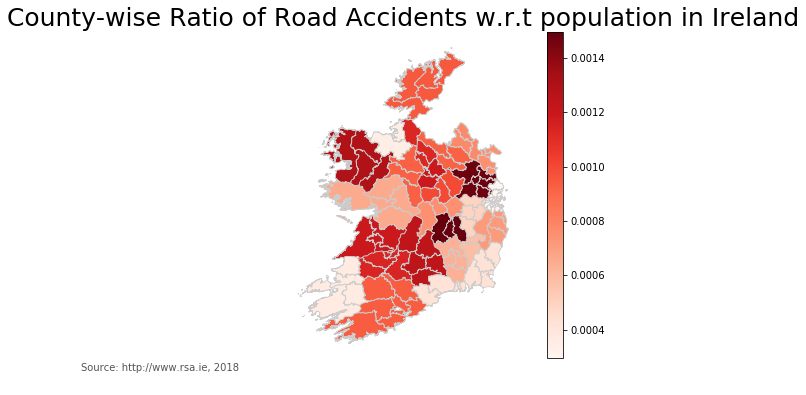

In [102]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'ratio'

# set the range for the choropleth
vmin, vmax = 0.000294, 0.001495

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('County-wise Ratio of Road Accidents w.r.t population in Ireland', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: http://www.rsa.ie, 2018',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
#this will save the figure as a high-res png. you can also save as svg
# fig.savefig('crime_rate_density.png', dpi=300)